In [35]:
import numpy as np
import matplotlib.pyplot as plt
import cv2

In [36]:
def show(img, mode="c"):
    if mode == "g":
        plt.imshow(img, cmap='gray', vmin=0, vmax=255)
    elif mode == "c": 
        plt.imshow(cv2.cvtColor(img, cv2.COLOR_BGR2RGB))


    plt.axis('off') 
    plt.show()

In [37]:
image = cv2.imread('test-img.jpg')

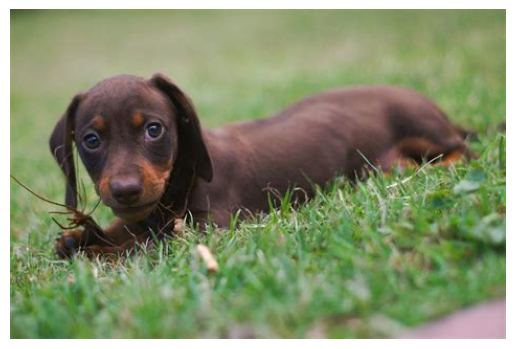

In [38]:
show(image)

In [39]:
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

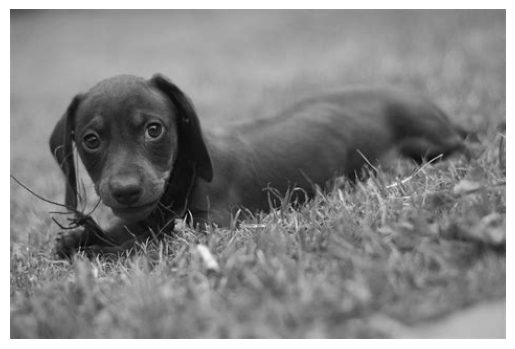

In [40]:
show(gray, "g")

In [41]:
gray.max()

243

In [42]:
gray.min()

1

In [43]:
def gray_plot(gray_img):
    
    y = np.zeros(256)

    for row in gray_img:
            for v in row:
                y[v] += 1
    
    x = np.arange(len(y))

    plt.plot(x, y)

In [44]:
def gray_bar_plot(gray_img):
    
    y = np.zeros(256)

    for row in gray_img:
            for v in row:
                y[v] += 1
    
    x = np.arange(len(y))

    plt.bar(x, y)
    plt.show()

    return x, y

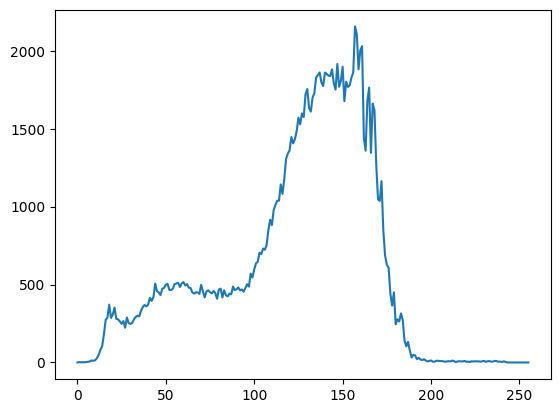

In [45]:
gray_plot(gray)

In [46]:
def thr(img, lower=0, upper=255):
    
    copy = img.copy()
    for i, row in enumerate(copy):
        for j, v in enumerate(row):
            if lower < v < upper:
                 # balck for valid values
                 copy[i][j] = 0
            else:
                # white for the rest
                copy[i][j] = 255
    
    return copy

In [47]:
def msk(img, mask):
    copy = img.copy()
    
    for i, row in enumerate(copy):
        for j, _ in enumerate(row):
            # whit spots are invalid
            if mask[i][j] == 255:
                copy[i][j] = 255
    
    return copy

In [48]:
def flt(img, lower=0, upper=255):
    copy = img.copy()

    # if the image is BGR
    if len(img.shape) == 3:
        return msk(copy, thr(cv2.cvtColor(img, cv2.COLOR_BGR2GRAY), lower, upper))
    else:
        return msk(copy, thr(img, lower, upper))

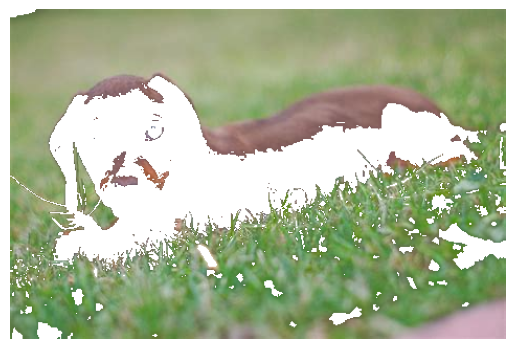

In [49]:
show(flt(image, 100, 200))

In [50]:
def inter_thr(img):

    # Compute the initial threshold (mean of all pixel values)
    initial_threshold = np.mean(img)

    # Initialize threshold value
    threshold = initial_threshold

    # Iteratively compute the intermeans threshold
    while True:
        # Split pixels into two groups based on the current threshold
        group1 = img[img <= threshold]
        group2 = img[img > threshold]
        
        # Calculate the mean values of each group
        mean1 = np.mean(group1) if len(group1) > 0 else 0
        mean2 = np.mean(group2) if len(group2) > 0 else 0
        
        # Calculate the new threshold as the average of the means of the two groups
        new_threshold = (mean1 + mean2) / 2.0
        
        # Check convergence
        if abs(threshold - new_threshold) < 1e-2:
            break
        
        threshold = new_threshold

    return int(threshold)


In [51]:
inter_thr(gray)

103

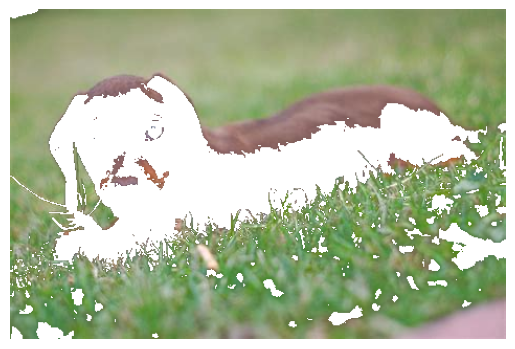

In [52]:
show(flt(image, inter_thr(gray), 255))

In [53]:
def diff(img1, img2):
    copy = img1.copy()

    for i, row in enumerate(copy):
        for j, v in enumerate(row):
            if np.all(v == img2[i][j]):
                copy[i][j] = 255
            else:
                copy[i][j] = 0
    
    return copy

In [54]:
img1 = flt(image, inter_thr(gray), 255)
img2 = flt(image, 100, 200)

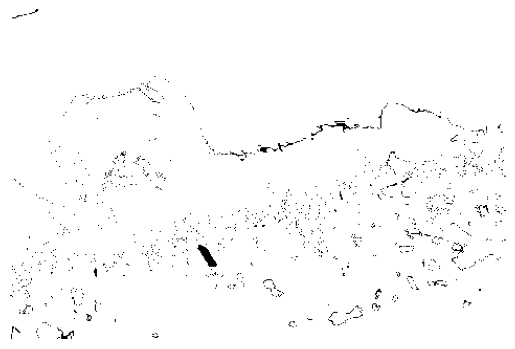

In [55]:
show(diff(img1, img2))

In [56]:
dog = cv2.imread('dog2.jpg')

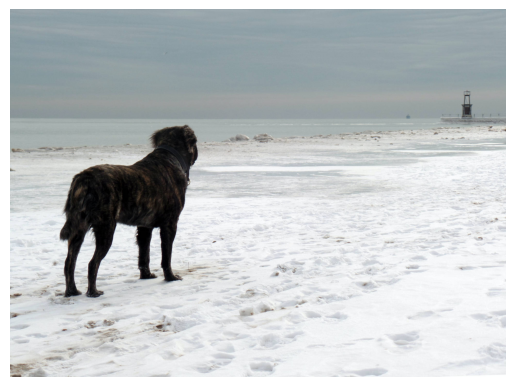

In [57]:
show(dog)

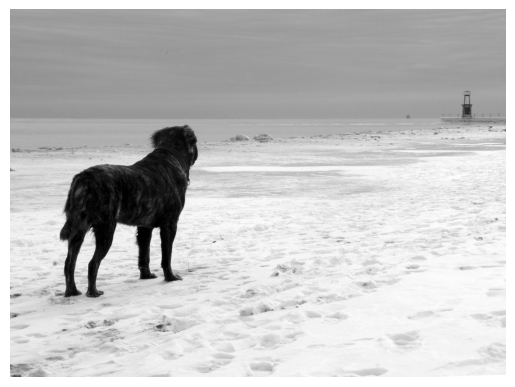

In [58]:
gray_dog = cv2.cvtColor(dog, cv2.COLOR_BGRA2GRAY)
show(gray_dog, "g")

In [59]:
t = inter_thr(gray_dog)
t

183

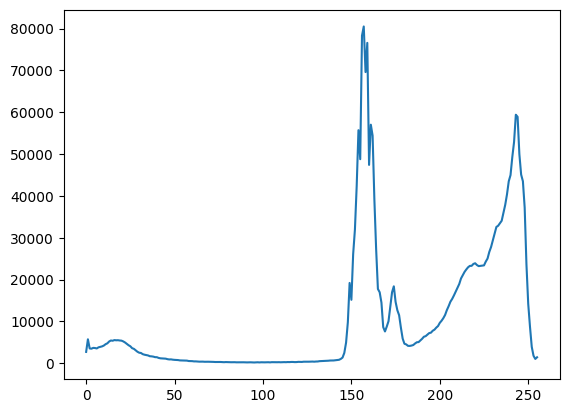

In [60]:
gray_plot(gray_dog)

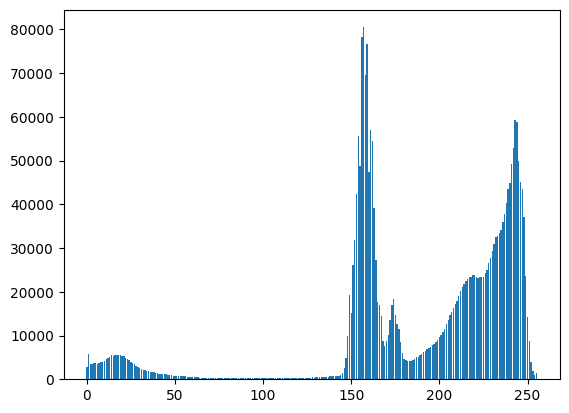

(array([  0,   1,   2,   3,   4,   5,   6,   7,   8,   9,  10,  11,  12,
         13,  14,  15,  16,  17,  18,  19,  20,  21,  22,  23,  24,  25,
         26,  27,  28,  29,  30,  31,  32,  33,  34,  35,  36,  37,  38,
         39,  40,  41,  42,  43,  44,  45,  46,  47,  48,  49,  50,  51,
         52,  53,  54,  55,  56,  57,  58,  59,  60,  61,  62,  63,  64,
         65,  66,  67,  68,  69,  70,  71,  72,  73,  74,  75,  76,  77,
         78,  79,  80,  81,  82,  83,  84,  85,  86,  87,  88,  89,  90,
         91,  92,  93,  94,  95,  96,  97,  98,  99, 100, 101, 102, 103,
        104, 105, 106, 107, 108, 109, 110, 111, 112, 113, 114, 115, 116,
        117, 118, 119, 120, 121, 122, 123, 124, 125, 126, 127, 128, 129,
        130, 131, 132, 133, 134, 135, 136, 137, 138, 139, 140, 141, 142,
        143, 144, 145, 146, 147, 148, 149, 150, 151, 152, 153, 154, 155,
        156, 157, 158, 159, 160, 161, 162, 163, 164, 165, 166, 167, 168,
        169, 170, 171, 172, 173, 174, 175, 176, 177

In [61]:
gray_bar_plot(gray_dog)

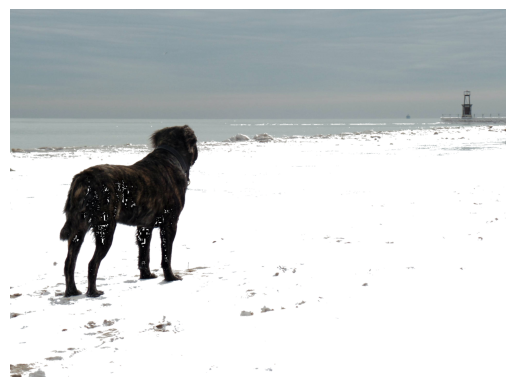

In [62]:
show(flt(dog, 0, t))

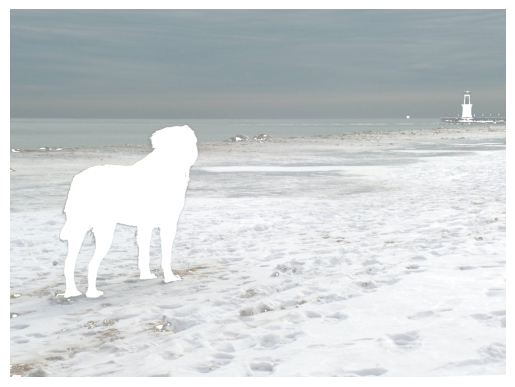

In [63]:
show(flt(dog, 130, 250))

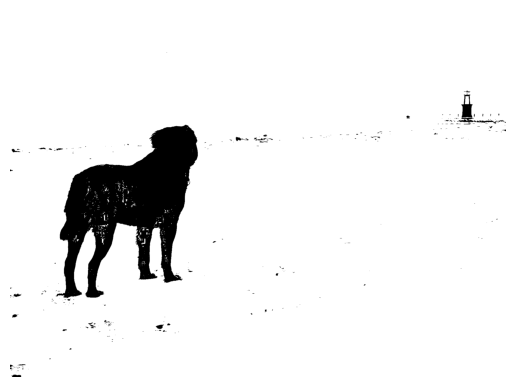

In [64]:
show(thr(gray_dog, 0, 130), "g")

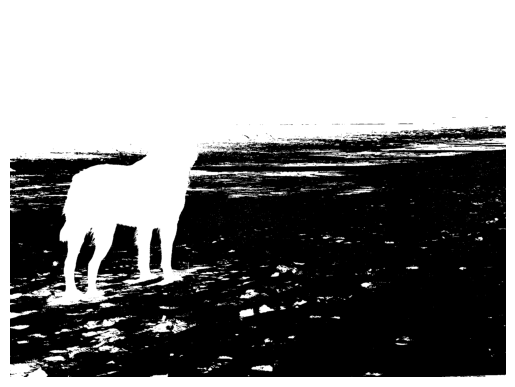

In [65]:
show(thr(gray_dog, 200, 255), "g")

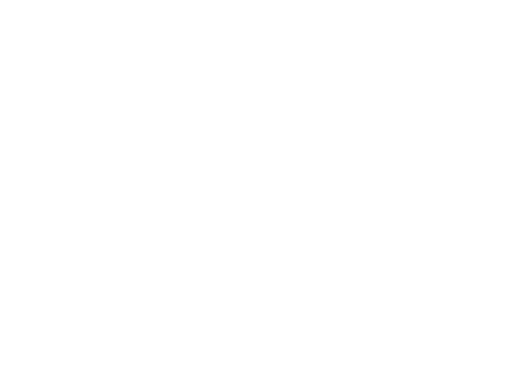

In [66]:
white = cv2.imread('white.jpg')
show(white)

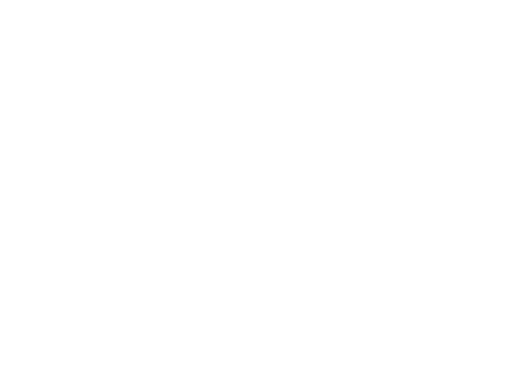

In [67]:
gray_white = cv2.cvtColor(white, cv2.COLOR_BGRA2GRAY)
show(gray_white, "g")

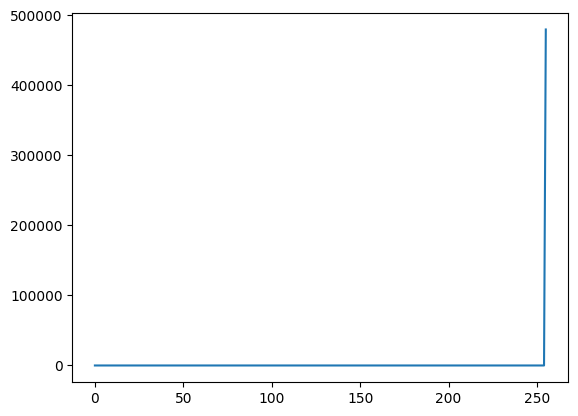

In [68]:
gray_plot(gray_white)

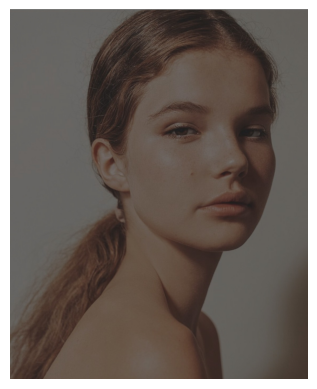

In [69]:
face = cv2.imread("face1.jpg")
show(face)

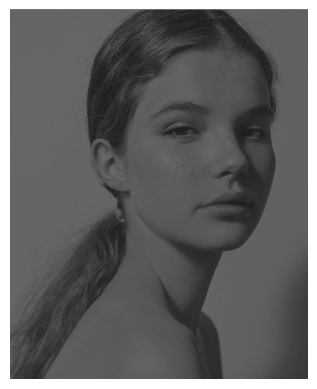

In [70]:
gray_face = cv2.cvtColor(face, cv2.COLOR_BGR2GRAY)
show(gray_face, "g")

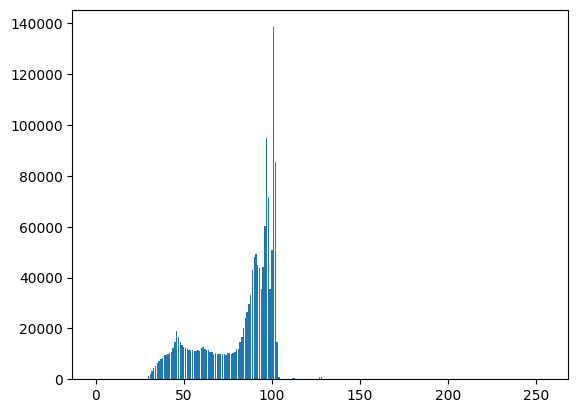

In [71]:
x, y = gray_bar_plot(gray_face)

In [72]:
def CDF(x_values, y_values):
    accu_values = 0
    x = []
    y = []
    
    for i, v in enumerate(y_values):
        if v > 0:
            accu_values += v
        
            y.append(accu_values)
            x.append(x_values[i])
    
    plt.bar(x, y)
    plt.show()
    
    return x, y
            

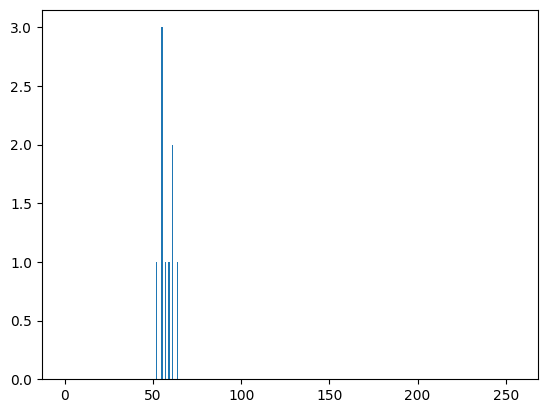

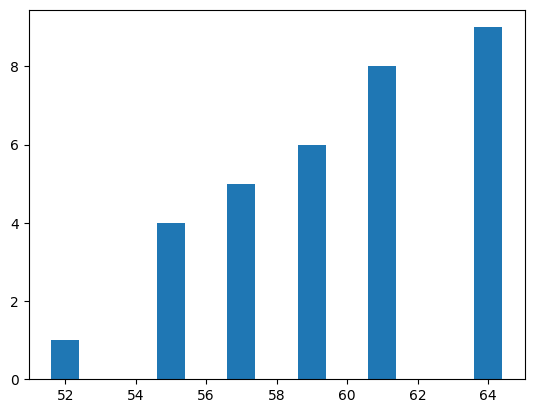

In [73]:
x, y = gray_bar_plot(np.array([[52, 55, 55], 
                               [55, 57, 59], 
                               [61, 61, 64]]))

x_new, y_new = CDF(x, y)

In [74]:
def map_to_255(int_list):
    # Convert the list to a numpy array
    arr = np.array(int_list)
    
    # Normalize to the range [0, 1]
    normalized = (arr - 1) / (arr.max() - 1)
    
    # Scale to the range [0, 255]
    scaled = normalized * 255
    
    # Convert to integers
    result = scaled.astype(int)
    
    return result

In [75]:
x_new

[52, 55, 57, 59, 61, 64]

In [76]:
y_new

[1.0, 4.0, 5.0, 6.0, 8.0, 9.0]

In [77]:
y_norm = map_to_255(y_new)   

In [78]:
y_norm

array([  0,  95, 127, 159, 223, 255])

In [79]:
def replace(img, old, new):
    copy = img.copy()

    for i, row in enumerate(copy):
        for j, v in enumerate(row):
            copy[i][j] = new[old.index(v)]
    
    return copy

In [80]:
def grau_egal(gray_img):
    x_h, y_h = gray_bar_plot(gray_img)

    x_cdf, y_cdf = CDF(x_h, y_h)

    y_norm = map_to_255(y_cdf)

    return replace(gray_img, x_cdf, y_norm)

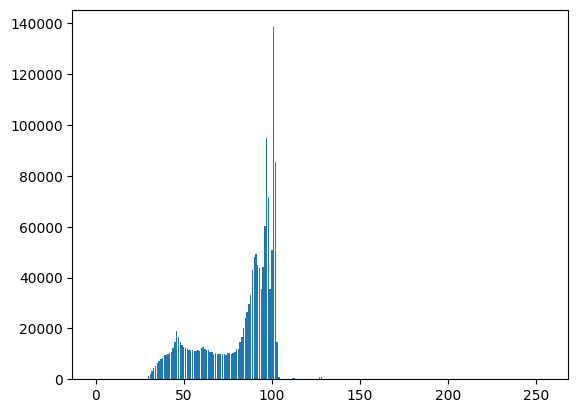

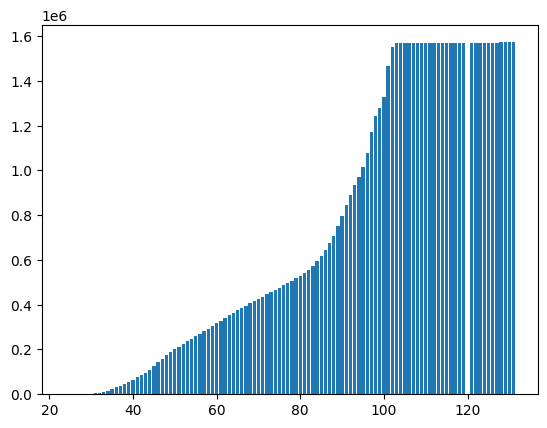

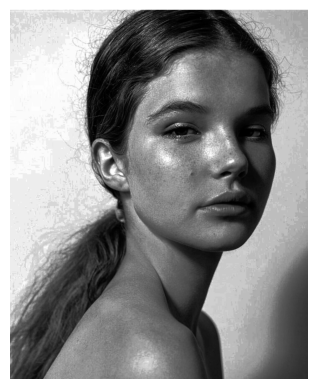

In [81]:
ge = grau_egal(gray_face)
show(ge)

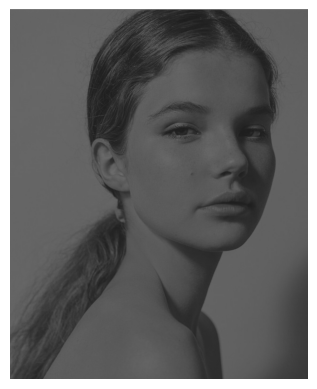

In [82]:
show(gray_face)

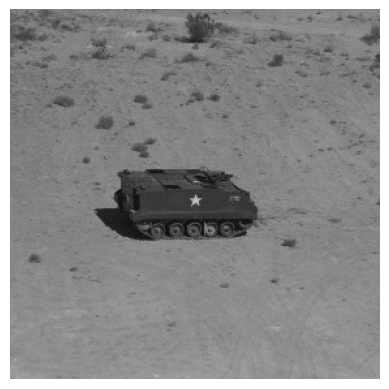

In [83]:
test2 = cv2.imread("test2.jpg")
gray_test2 = cv2.cvtColor(test2, cv2.COLOR_BGR2GRAY)
show(gray_test2)

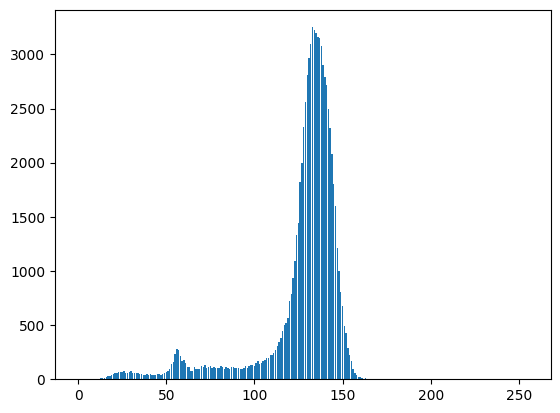

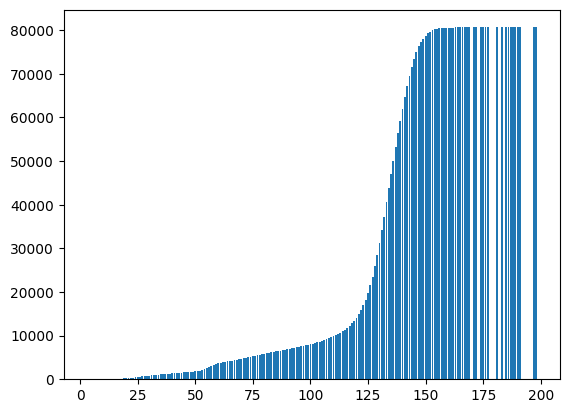

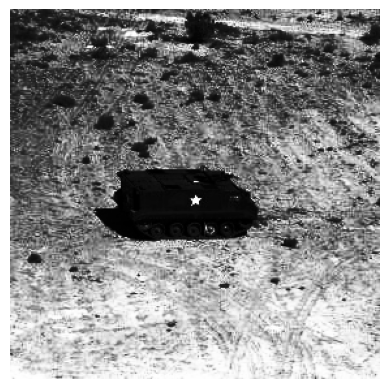

In [84]:
norm_test2 = grau_egal(gray_test2)
show(norm_test2)

In [85]:
test2_thr = inter_thr(norm_test2)
test2_thr

130

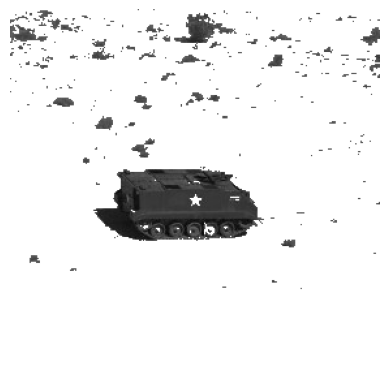

In [86]:
show(flt(test2, 0, 100))

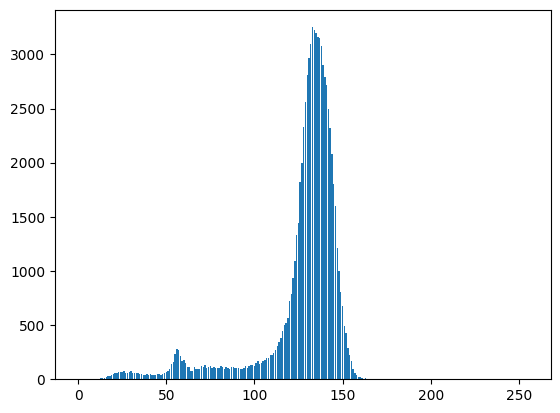

In [90]:
_, _ = gray_bar_plot(test2)

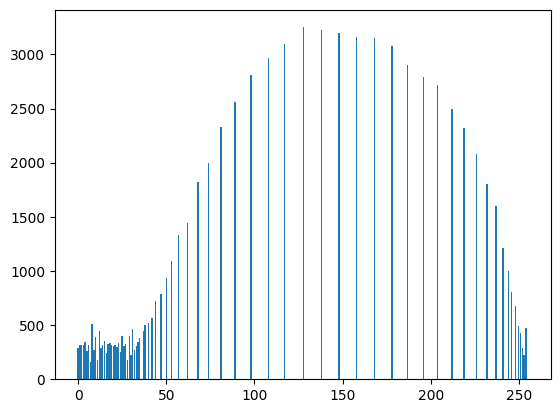

In [91]:
_ , _ = gray_bar_plot(norm_test2)

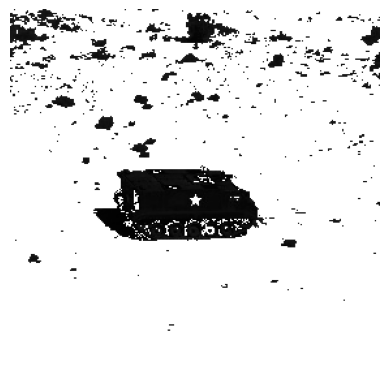

In [95]:
show(flt(np.asarray(norm_test2), 0, 30))